In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation des classes nécessaires de scikit-survival
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.ensemble import RandomSurvivalForest
from sksurv.preprocessing import OneHotEncoder
from sksurv.metrics import concordance_index_ipcw
from sksurv.util import Surv

In [2]:
# Charger le dataset
data = load_veterans_lung_cancer()

In [3]:
# Préparer les covariables et la cible
X_raw = pd.DataFrame(data[0])  # Les covariables
y = data[1]                    # Les données de survie (temps de survie et statut de l'événement)


In [4]:
X_raw.head(10)

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
5,49.0,squamous,20.0,5.0,no,standard
6,69.0,squamous,40.0,10.0,yes,standard
7,68.0,squamous,80.0,29.0,no,standard
8,43.0,squamous,50.0,18.0,no,standard
9,70.0,squamous,70.0,6.0,no,standard


In [5]:
y[1:10]

array([( True, 411.), ( True, 228.), ( True, 126.), ( True, 118.),
       ( True,  10.), ( True,  82.), ( True, 110.), ( True, 314.),
       (False, 100.)],
      dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

In [6]:
# Encoder les variables catégorielles (par ex. "celltype")
encoder = OneHotEncoder()
X = encoder.fit_transform(X_raw)

In [7]:
X.head(10)

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0
5,49.0,0.0,0.0,1.0,20.0,5.0,0.0,0.0
6,69.0,0.0,0.0,1.0,40.0,10.0,1.0,0.0
7,68.0,0.0,0.0,1.0,80.0,29.0,0.0,0.0
8,43.0,0.0,0.0,1.0,50.0,18.0,0.0,0.0
9,70.0,0.0,0.0,1.0,70.0,6.0,0.0,0.0


In [8]:
# Créer un modèle de Random Survival Forest
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15, random_state=42)

# Ajuster le modèle aux données
rsf.fit(X, y)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10, random_state=42)

In [9]:
# Prédiction des courbes de survie pour les patients
# Pour simplifier, on prédit pour les 5 premiers patients
pred_surv_curves = rsf.predict_survival_function(X.iloc[:5, :])


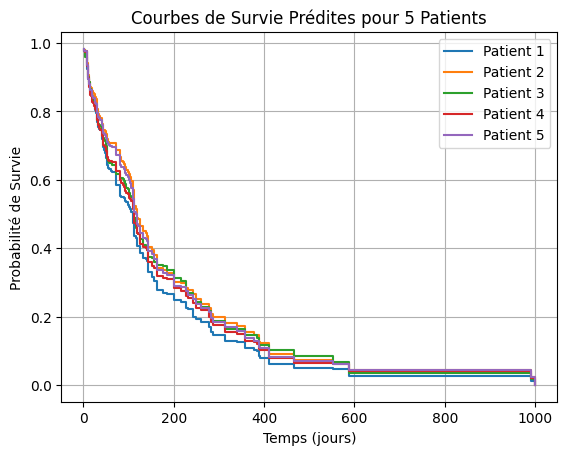

In [10]:
# Visualisation des courbes de survie prédites pour ces patients
for i, surv_func in enumerate(pred_surv_curves):
    plt.step(surv_func.x, surv_func.y, where="post", label=f"Patient {i + 1}")

plt.ylabel("Probabilité de Survie")
plt.xlabel("Temps (jours)")
plt.title("Courbes de Survie Prédites pour 5 Patients")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Load model explainer
from src.explainer import explainer
model_explainer = explainer(rsf, X, y)

SyntaxError: invalid syntax (explainer.py, line 37)